**I always wondered if my performance in studies, as well as that of my friends, depended exclusively on us.**

This data set contains a lot of information about the background of 1000 students, my goal here will be to answer my question from the previous paragraph and create a model that tries to predict what the student's final writing grade would be based on this backgroup and his other tests

**Attribute Information:**

1. gender: "female" or "male".
2. race/ethnicity: "group A", "group B", "group C", "group D" or "group E"
3. parental level of education: "some high school", "high school", "some college", "associate's degree", "bachelor's degree" or "master's degree"
4. lunch: "standard" or "free/reduced"
5. test preparation course: "none" or "completed"
6. math score: score between 0 and 100
7. reading score: score between 0 and 100
8. writing score: score between 0 and 100


## **Data Visualization**

In [1]:
# Importing libraries

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
# Loading the dataset
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
sns.set()

# Showing the first three rows of the dataset
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [3]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Checking a overview of our data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
# Verifying if there's any null data
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Great, no null data.

### **Checking the quantity of our variables**

We need to see how our categories are distributed to understand our data and to check for possible bias.

Text(0, 0.5, 'Frequency')

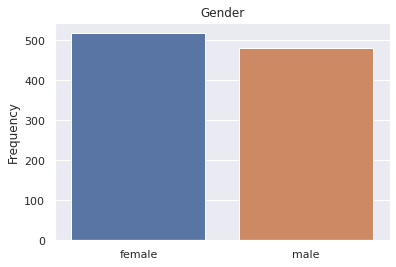

In [6]:
# Plotting gender frequency
plt.title("Gender")
sns.countplot(df["gender"])
plt.xlabel("")
plt.ylabel("Frequency")

The quantity of women is slightly greater than men, but this doesn't affect the data balance.

Text(0, 0.5, 'Frequency')

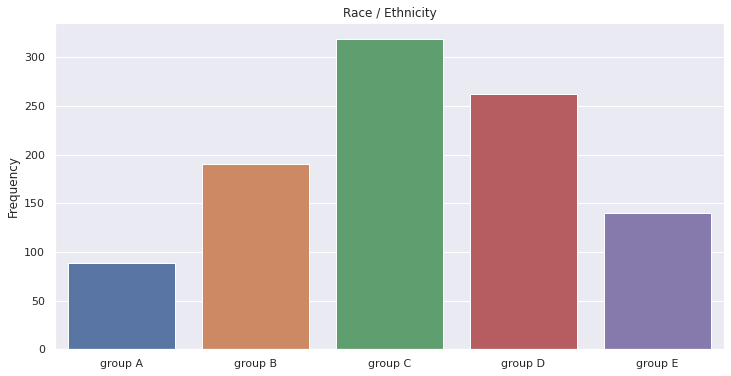

In [7]:
# Plotting race/ethnicity frequency
plt.figure(figsize=(12, 6))
plt.title("Race / Ethnicity")
sns.countplot(df["race/ethnicity"].sort_values())
plt.xlabel("")
plt.ylabel("Frequency")

The ethnic group with the most representations is C, while group A has the smallest amount. 

Text(0, 0.5, 'Frequency')

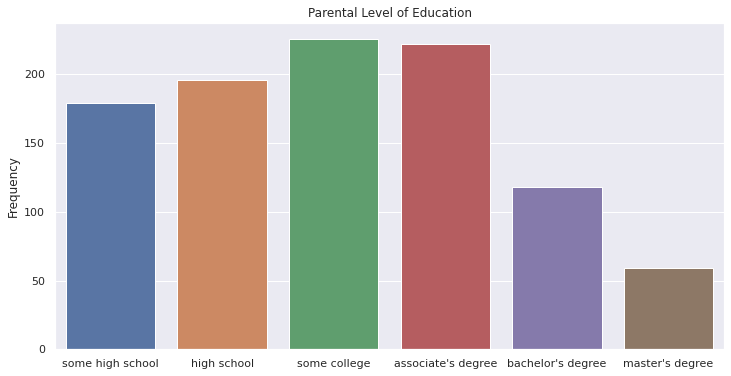

In [8]:
# Plotting parental level of education frequency
plt.figure(figsize=(12, 6))
plt.title("Parental Level of Education")
sns.countplot(df["parental level of education"], order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.xlabel("")
plt.ylabel("Frequency")

The number of graduated parents is lower than other categories as expected. There's a greater number of non-graduated parents.

Text(0, 0.5, 'Frequency')

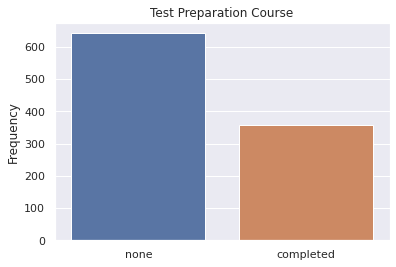

In [9]:
# Plotting test preparation frequency
plt.title("Test Preparation Course")
sns.countplot(df["test preparation course"])
plt.xlabel("")
plt.ylabel("Frequency")

The number of students who didn't had a preparation course is bigger than student who had. 

Text(0, 0.5, 'Frequency')

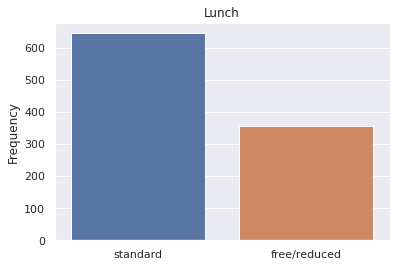

In [10]:
# Plotting lunch frequency
plt.title("Lunch")
sns.countplot(df["lunch"])
plt.xlabel("")
plt.ylabel("Frequency")

Fortunately, most students have full meals.

### **Checking how variables influence performance**

First let's check how each variable influences the performance of the exams. 

We'll extract the average score for each variable in each discipline 

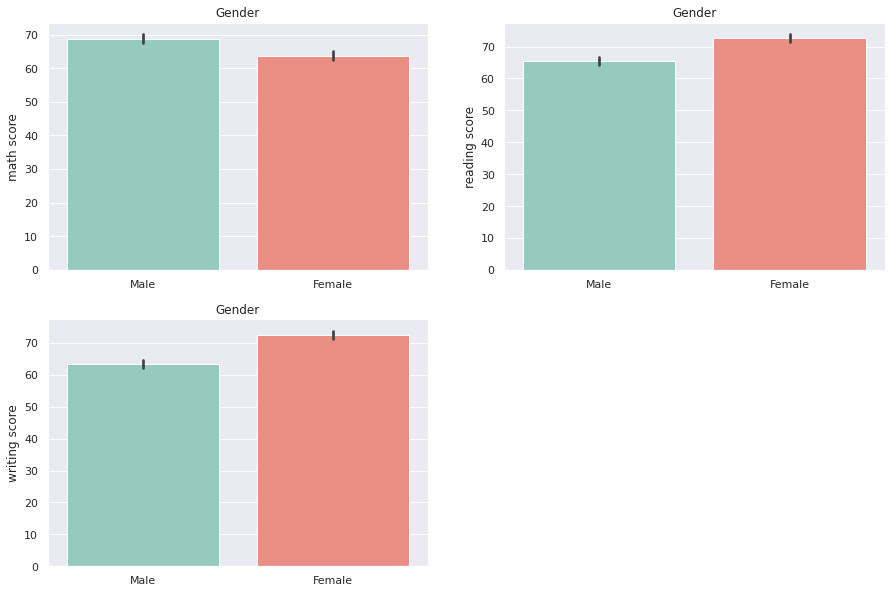

In [11]:
# Plotting the average score for gender in each test
categorical_variable = ["math score", "reading score", "writing score"]

plt.figure(figsize=(15, 10))
for i, n in enumerate(categorical_variable):
    plt.subplot(2, 2, i+1)
    plt.ylabel(f"Average {n} score")
    plt.title("Gender")
    sns.barplot(y=n, x="gender", data=df, palette=["#8dd3c7", "#fb8072"], order=["male", "female"])
    plt.xlabel("")
    plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.show()

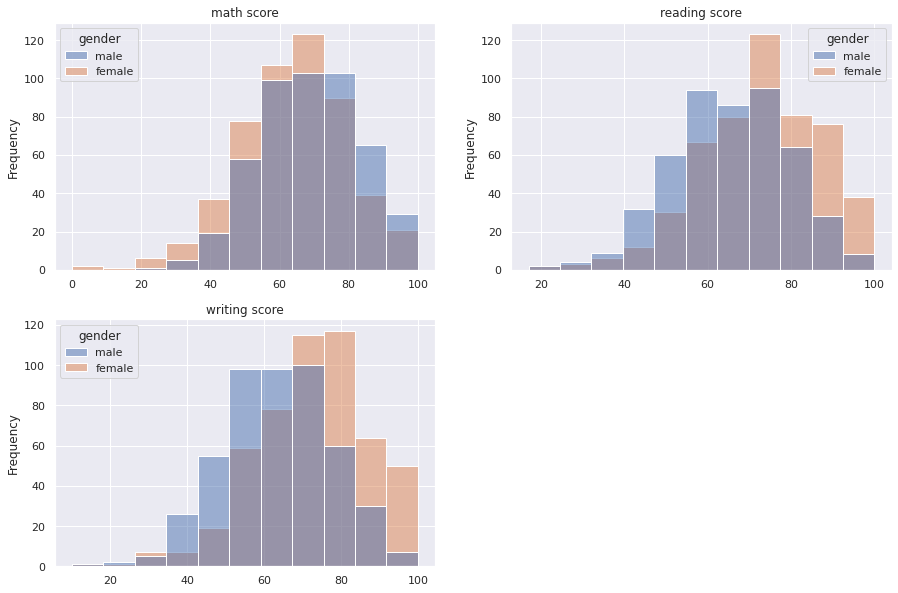

In [12]:
# Plotting the frequency of average score per gender.

plt.figure(figsize=(15, 10))
for i, n in enumerate(categorical_variable):
    plt.subplot(2, 2, i+1)
    plt.title(n)
    plt.ylabel("Frequency")
    sns.histplot(x=n, data=df, hue="gender", bins="sturges", hue_order=["male", "female"])
    plt.xlabel("")
plt.show()

According to this dataset, women perform better in reading / writing, while men in math. 

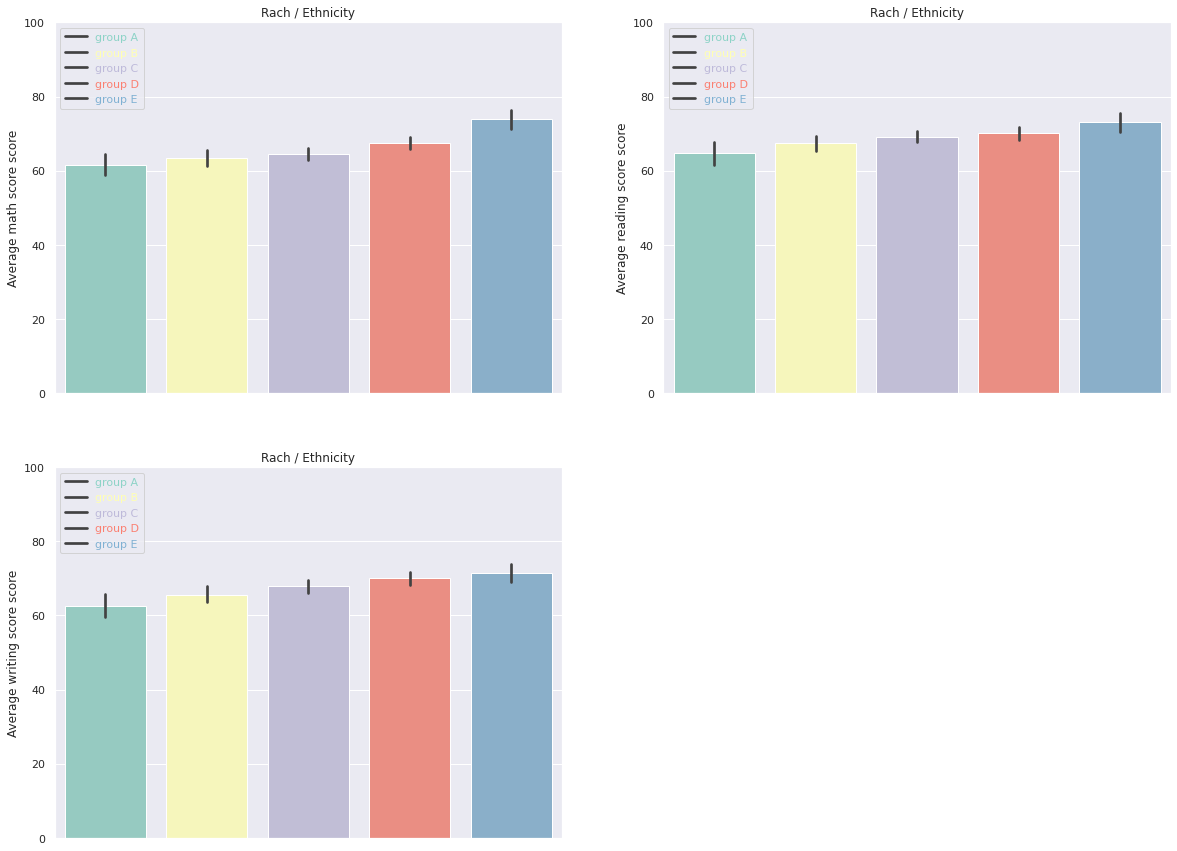

In [13]:
# Plotting the average score for race/ethnicity course in each test

plt.figure(figsize=(20, 15))
for i, n in enumerate(categorical_variable):
    plt.subplot(2, 2, i+1)
    plt.title("Rach / Ethnicity")
    plt.ylim(0, 100)
    sns.barplot(y=n, x="race/ethnicity", data=df, palette="Set3", 
                order=["group A", "group B", "group C", "group D", "group E"])
    plt.legend(labels=["group A", "group B", "group C", "group D", "group E"], 
                       loc=2, labelcolor=["#8dd3c7","#ffffb3", "#bebada", "#fb8072", "#80b1d3"])
    plt.ylabel(f"Average {n} score")
    plt.xlabel("")
    plt.xticks([])
plt.show()

Ethnicity represented by group E achieve best scores, while group A the lower scores. 

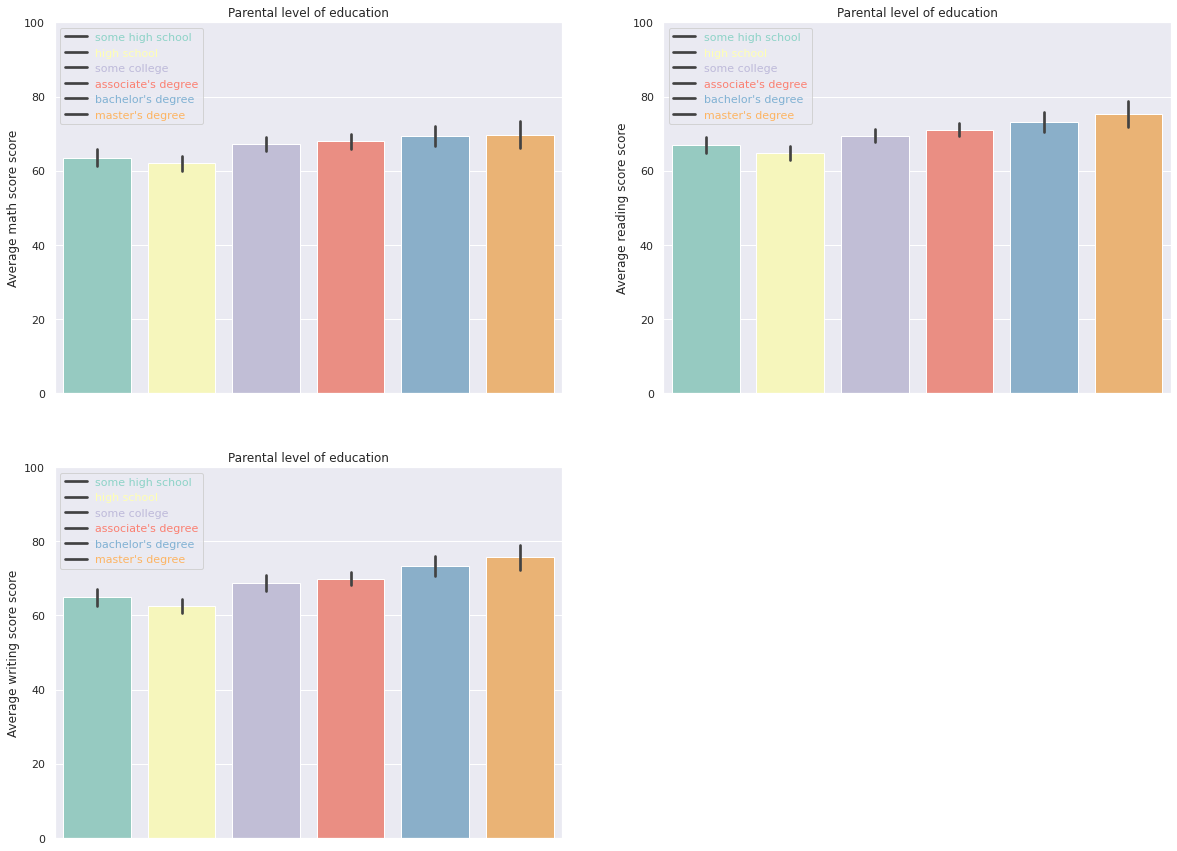

In [14]:
# Plotting the average score for parental level in each test

plt.figure(figsize=(20, 15))
for i, n in enumerate(categorical_variable):
    plt.subplot(2, 2, i+1)
    plt.title("Parental level of education")
    plt.ylim(0, 100)
    sns.barplot(y=n, x="parental level of education", data=df, palette="Set3", 
                order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
    plt.legend(labels=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"], 
                          loc=2, labelcolor=["#8dd3c7","#ffffb3", "#bebada", "#fb8072", "#80b1d3", "#fdb462"])
    plt.ylabel(f"Average {n} score")
    plt.xlabel("")
    plt.xticks([])
plt.show()

The parental degree influences the performance of the student. The more experienced the parents are, the better the results of the children

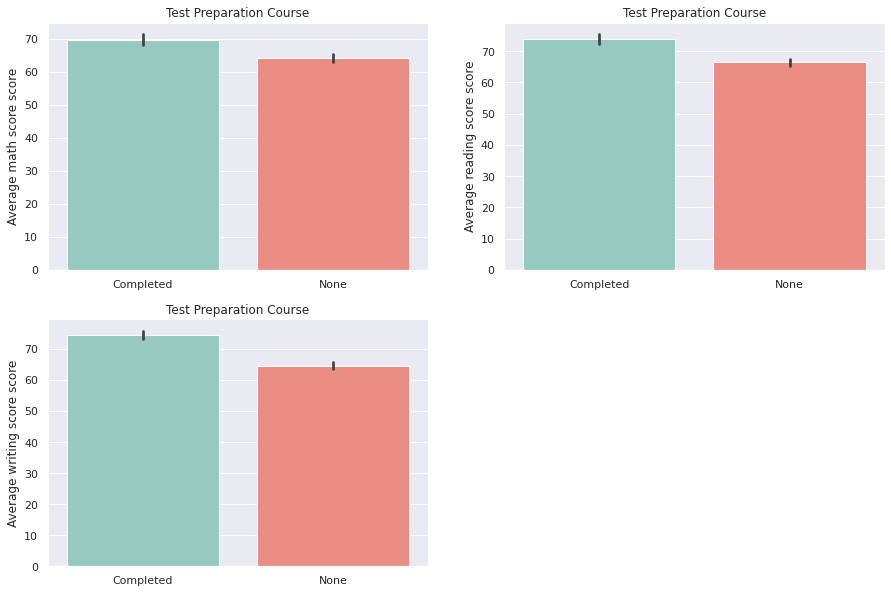

In [15]:
# Plotting the average score for test preparation course in each test

plt.figure(figsize=(15, 10))
for i, n in enumerate(categorical_variable):
    plt.subplot(2, 2, i+1)
    plt.title("Test Preparation Course")
    sns.barplot(y=n, x="test preparation course", data=df, palette=["#8dd3c7", "#fb8072"], order=["completed", "none"])
    plt.ylabel(f"Average {n} score")
    plt.xlabel("")
    plt.xticks(ticks=[0, 1], labels=["Completed", "None"])
plt.show()

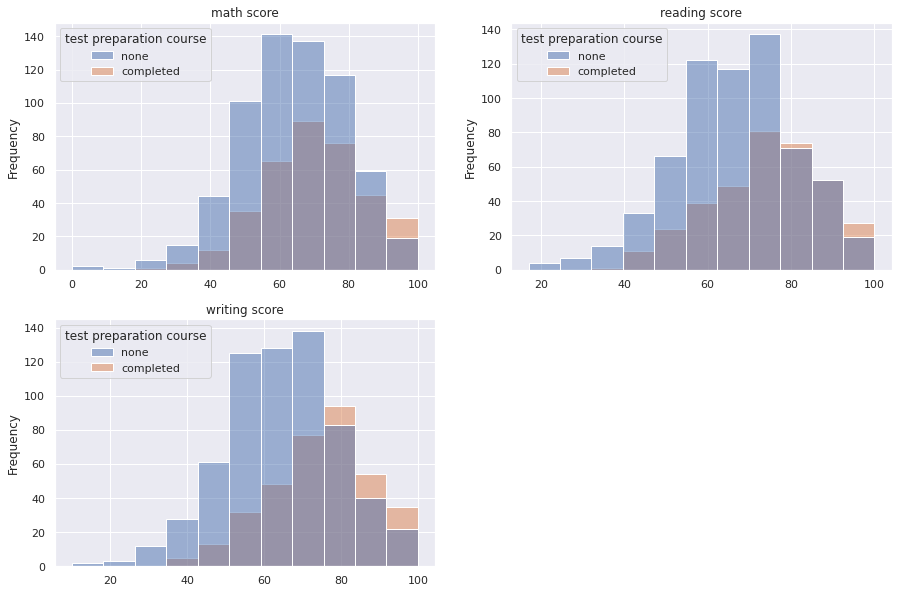

In [16]:
# Plotting the frequency of average score per test preparation course

plt.figure(figsize=(15, 10))
for i, n in enumerate(categorical_variable):
    plt.subplot(2, 2, i+1)
    plt.title(n)
    plt.ylabel("Frequency")
    sns.histplot(x=n, data=df, hue="test preparation course", bins="sturges", hue_order=["none", "completed"])
    plt.xlabel("")
plt.show()

The opportunity to prepare with a course greatly influences the final result. No one that had a preparation course scored less than 40 in reading and 35 in writing.

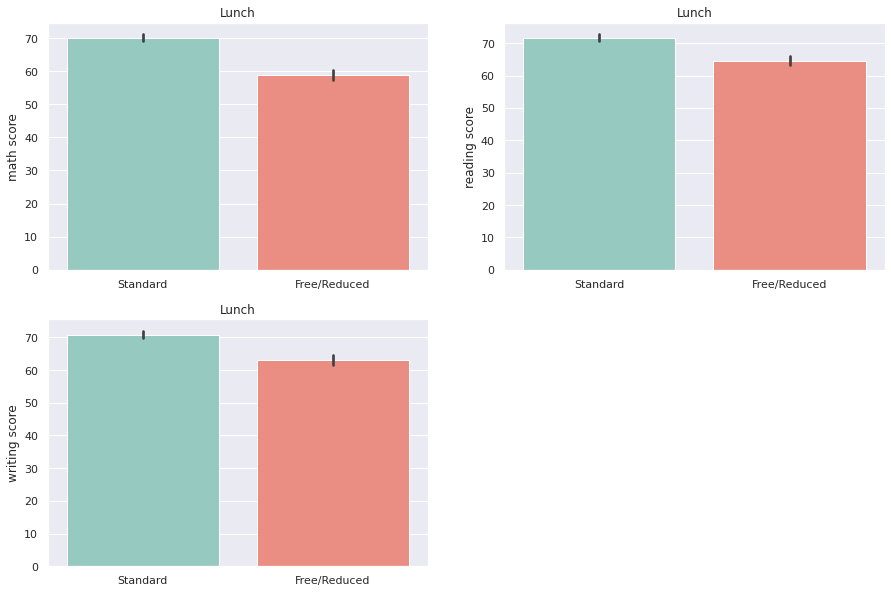

In [17]:
# Plotting the average score for lunch in each test

plt.figure(figsize=(15, 10))
for i, n in enumerate(categorical_variable):
    plt.subplot(2, 2, i+1)
    plt.ylabel(f"Average {n} score")
    plt.title("Lunch")
    sns.barplot(y=n, x="lunch", data=df, palette=["#8dd3c7", "#fb8072"])
    plt.xlabel("")
    plt.xticks(ticks=[0, 1], labels=["Standard", "Free/Reduced"])
plt.show()

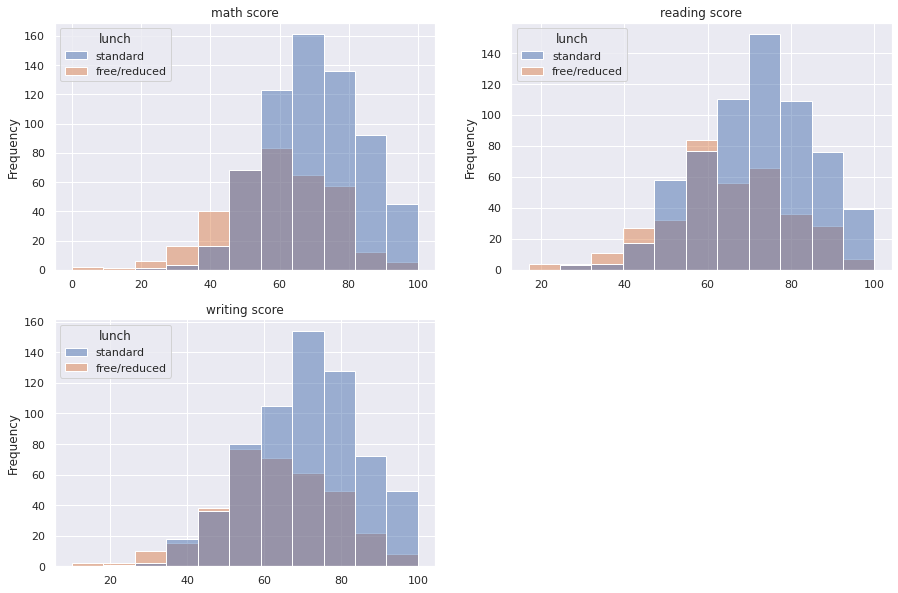

In [18]:
# Plotting the frequency of average score per lunch.

plt.figure(figsize=(15, 10))
for i, n in enumerate(categorical_variable):
    plt.subplot(2, 2, i+1)
    plt.title(n)
    plt.ylabel("Frequency")
    sns.histplot(x=n, data=df, hue="lunch", bins="sturges", hue_order=["standard", "free/reduced"])
    plt.xlabel("")
plt.show()

Even the quality of your meals influences your final performance.

### **Student's background influences the performance?**

We'll pick two categories of students, students that only have favorable attributes and students without a single favorable background. The objetive is verify if the student's background of life influences the performance in the final test.

In [19]:
# Creating a copy of the data
df1 = df.copy()

# Creating column's names without special characters
df1["test_preparation_course"] = df1["test preparation course"]
df1["parental_level_of_education"] = df1["parental level of education"]
df1["race_ethnicity"] = df1["race/ethnicity"]

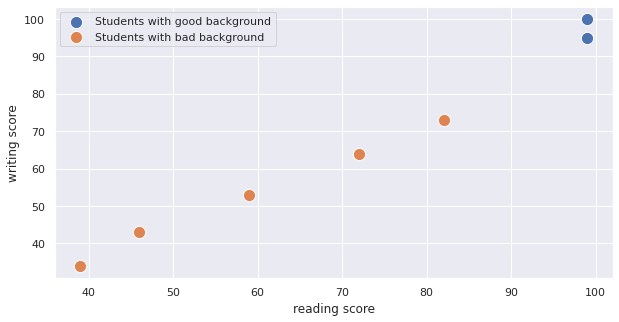

In [20]:
# Selecting only students with good background attributes
gv = df1.query("""lunch == "standard" & test_preparation_course == "completed" & parental_level_of_education == ["master's degree"] & race_ethnicity == ["group E"] & gender == "female" """)

# Selecting only students with bad background attributes
bv = df1.query("""lunch == ["free/reduced"] & test_preparation_course == "none" & parental_level_of_education == ["some high school"] & race_ethnicity == ["group A"] & gender == "male" """)

# Plotting the interception between the grades of those students previously selected
plt.figure(figsize=(10, 5))
plt.legend(loc=0)
sns.scatterplot(x=gv["reading score"], y=gv["writing score"], label="Students with good background", s=150)
sns.scatterplot(x=bv["reading score"], y=bv["writing score"], label="Students with bad background", s=150)
plt.show()

Although the sample is quite small, it's still possible to see an absurd difference in performance just by the student's background

### **Student's ethnicity influences the chance of having other favorables attributes?**

We'll investigate if there's any indication that being born into a specific race increases your chances of having a favorable background.

Text(0, 0.5, 'Lunch Frequency')

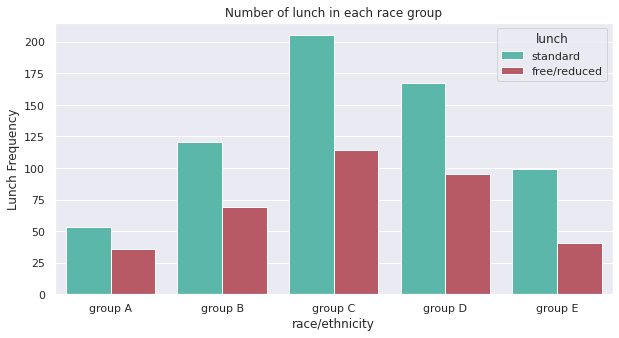

In [21]:
# Plotting the frequency of lunch in each race/ethnicity

plt.figure(figsize=(10, 5))
sns.countplot(data=df,x='race/ethnicity',hue='lunch', order=["group A", "group B", "group C", "group D", "group E"],
             palette=["#4AC6B5", "#C64A5B"])
plt.title('Number of lunch in each race group');
plt.ylabel("Lunch Frequency")



We can highlight that students in group A are more likely to use the free or reduced lunch, while students in group E are more likely to have a standard lunch.

Text(0, 0.5, 'Parental Level Frequency')

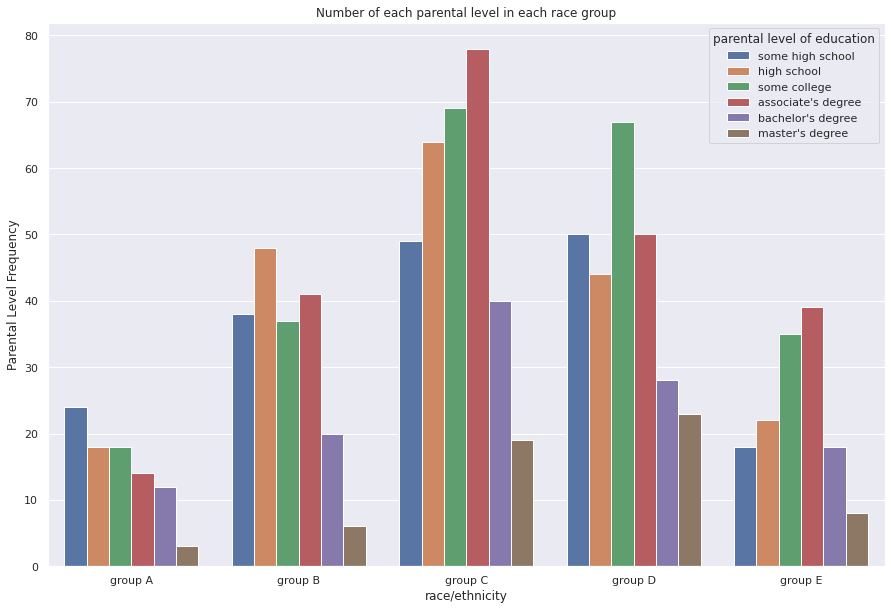

In [22]:
# Plotting the frequency of parental level in each race/ethnicity

plt.figure(figsize=(15, 10))
sns.countplot(data=df,x='race/ethnicity', hue='parental level of education', order=["group A", "group B", "group C", "group D", "group E"],
             hue_order=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Number of each parental level in each race group')
plt.ylabel("Parental Level Frequency")

Students of group A are more likely to have parents with a low level of education, while group C and group E are more likely to have a associate's degree and have low levels of parents without high school. Despite that, group D has the best percentage and absolut number of parents with master's degree.

Text(0, 0.5, 'Test Preparation Frequency')

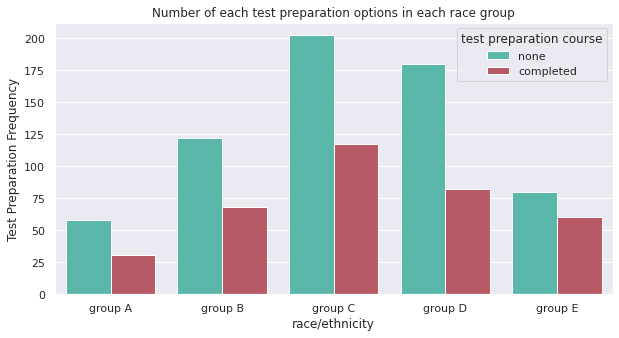

In [23]:
# Plotting the frequency of test preparation in each race/ethnicity

plt.figure(figsize=(10, 5))
sns.countplot(data=df,x='race/ethnicity',hue='test preparation course', order=["group A", "group B", "group C", "group D", "group E"],
             palette=["#4AC6B5", "#C64A5B"])
plt.title('Number of each test preparation options in each race group');
plt.ylabel("Test Preparation Frequency")

It seems that there is approximately the same chance that a student does not take any preparatory course in all groups, except in group E, where almost half students take a preparation course before final exam.

**Outline**
* Ethnicity influences other positive characteristics of student's background

### **Student's parental education influences the chance of having other favorables attribute?**

We'll investigate if student's with higher parental level education are more susceptible to take a preparation course and have a standard lunch.

Text(0, 0.5, 'Test Preparation Count')

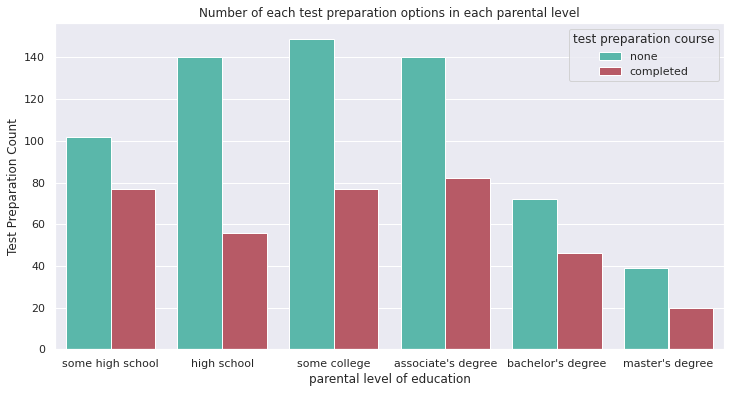

In [24]:
# Plotting the frequency of test preparation course in each parental level

plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='parental level of education',hue='test preparation course', order=["some high school", "high school", 
                                                                                            "some college", "associate's degree", 
                                                                                            "bachelor's degree", "master's degree"],
             palette=["#4AC6B5", "#C64A5B"])
plt.title('Number of each test preparation options in each parental level');
plt.ylabel("Test Preparation Count")

I thought that greater parental education would result in students more likely to take a preparatory course, but I was wrong. The lower parental level is the one with the highest percentage number of students taking the preparatory course. 

Finally, it seems that there is no propensity to take a preparatory course according to the level of education of the parents

Text(0, 0.5, 'Lunch Count')

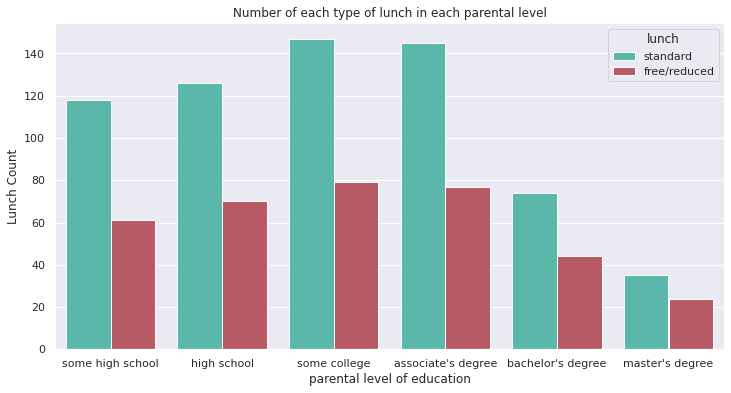

In [25]:
# Plotting the frequency of lunch in each parental level

plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='parental level of education',hue='lunch', order=["some high school", "high school", 
                                                                          "some college", "associate's degree", 
                                                                          "bachelor's degree", "master's degree"],
             palette=["#4AC6B5", "#C64A5B"])
plt.title('Number of each type of lunch in each parental level');
plt.ylabel("Lunch Count")

It seems that there is approximately the same chance that a student does not have a standard lunch, except in group E, where there's a higher chance of a student eat a free/reduced lunch. 

It also seems that there is no propensity to eat a standard lunch according to the level of education of the parents.

**Outline**

* Parental level of education seems to have no influence on the student's food and technical preparation for the final exam.

### **There's any correlation between the test scores?**

<AxesSubplot:>

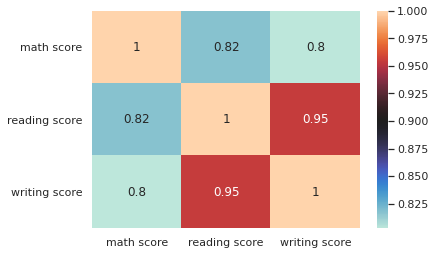

In [26]:
sns.heatmap(df.corr(), annot=True, cmap="icefire")

**Outline**
* Yes, there is a great correlation between the test scores, the main one between the reading and writing test. We can conclude that if the student is doing well, he will do well in all tests.

## **Developing model**

### **Looking if it's possible to trace a line between numerical categories and non-numerical**

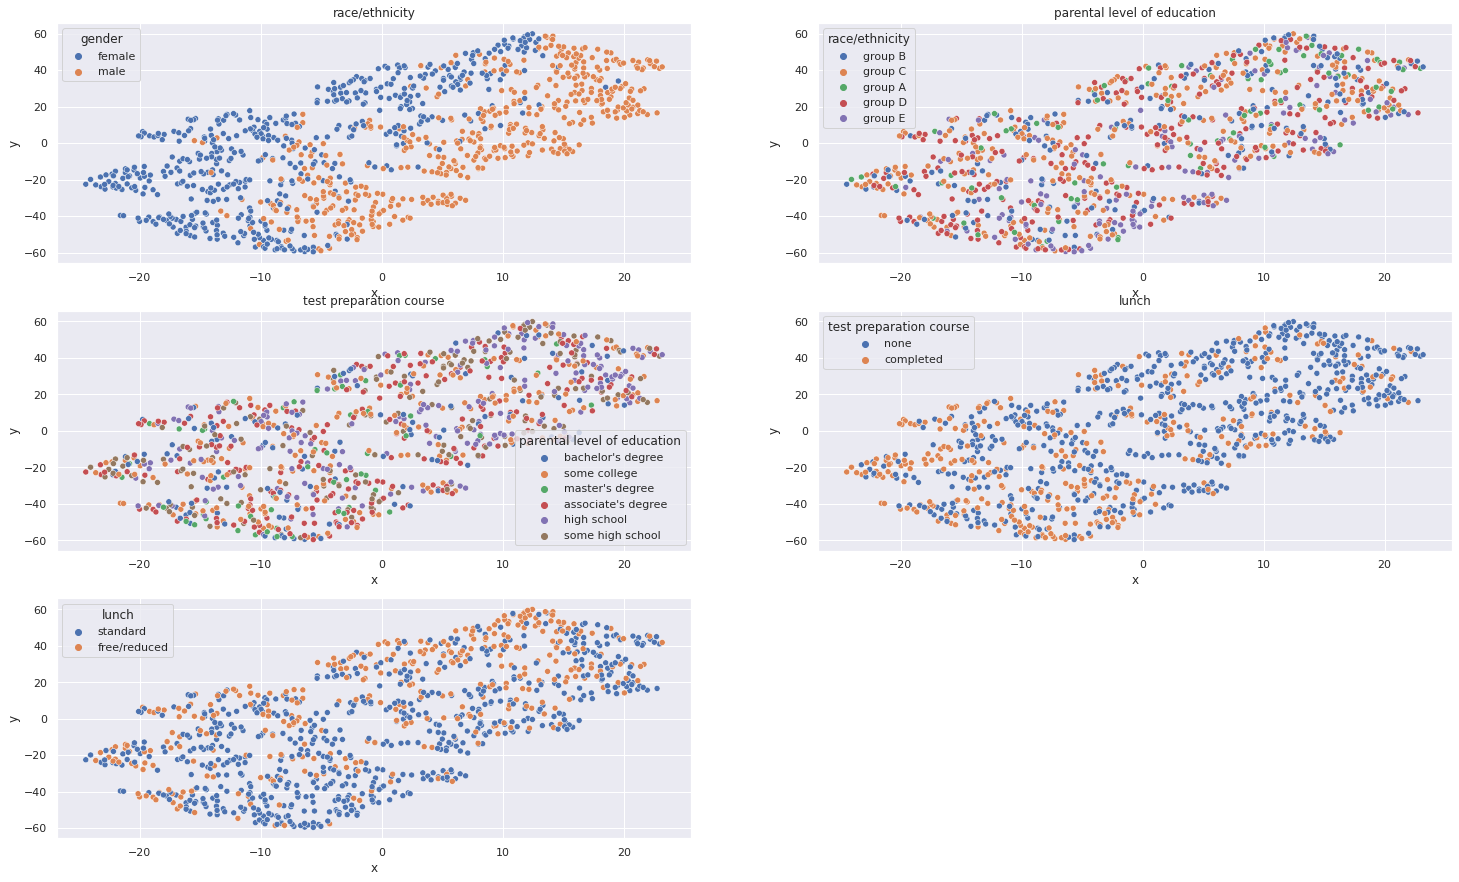

In [27]:
# Creating a copy of the data
df_tsn = df.copy()

# Creating a copy of numerical data
m = df_tsn[["math score", "reading score", "writing score"]].copy()

# Training our model
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(m)

# Creating a new column with results of our training
df_tsn["x"] = tsne_features[:, 0]
df_tsn["y"] = tsne_features[:, 1]

# Creating a list with non numerical data
non_numerical = ["gender", "race/ethnicity", "parental level of education", "test preparation course", "lunch"]

# Plotting the result of the trained model in each category
plt.figure(figsize=(25, 15))
for i, n in enumerate(non_numerical):
    plt.title(n)
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x="x", y="y", hue=n, data=df_tsn)
plt.show()

**Outline**

* It seems that it is not possible to pass a line between most categories, so I will try to use the svm model to increase the size of the data and to be able to create a division.
* I will also compare it with the random forest model, considering that it is a decision-making model and see who performs better

### **Random Forest**

**Why choose random forest?**

* It's possible to see which attributes the model considers most important
* It will handle the missing values and maintain the accuracy of a large proportion of data.
* If there are more trees, it won’t allow over-fitting trees in the model.

**Preprocessing**

In [28]:
# Separating data of the target
x = df[["gender", "race/ethnicity", "parental level of education", "test preparation course", "lunch", "math score", "reading score"]]
y = df[["writing score"]]

# Loading LabelEncoder
label_x = LabelEncoder()

# Transforming the non numerical data into numerical data
x["gender"]                      = label_x.fit_transform(x["gender"])
x["race/ethnicity"]              = label_x.fit_transform(x["race/ethnicity"])
x["parental level of education"] = label_x.fit_transform(x["parental level of education"])
x["test preparation course"]     = label_x.fit_transform(x["test preparation course"])
x["lunch"]                       = label_x.fit_transform(x["lunch"])

# Separating training data of test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

**Model Creation**

In [29]:
# Training Random Forest Model
rf_regressor = RandomForestRegressor(n_estimators=80, random_state=0)
rf_regressor.fit(x_train, y_train)

# Predicting values to the target
predict = rf_regressor.predict(x_test)

# Checking the mean absolute error
mae = mean_absolute_error(y_test, predict)
mae

2.895625000000001

In [30]:
# Checking the importance of each column to our model
rf_regressor.feature_importances_

# Creating a dataframe with the importance of each column to our random forest model
pd.DataFrame({"gender": rf_regressor.feature_importances_[0], "race/ethnicity": rf_regressor.feature_importances_[1], 
              "parental level of education": rf_regressor.feature_importances_[2], "test preparation course": rf_regressor.feature_importances_[3],
              "lunch": rf_regressor.feature_importances_[4], "math score": rf_regressor.feature_importances_[5],
              "reading score": rf_regressor.feature_importances_[6]}, index={"1"})

,gender,race/ethnicity,parental level of education,test preparation course,lunch,math score,reading score
1,0.009738,0.011391,0.012363,0.009881,0.003527,0.029495,0.923604


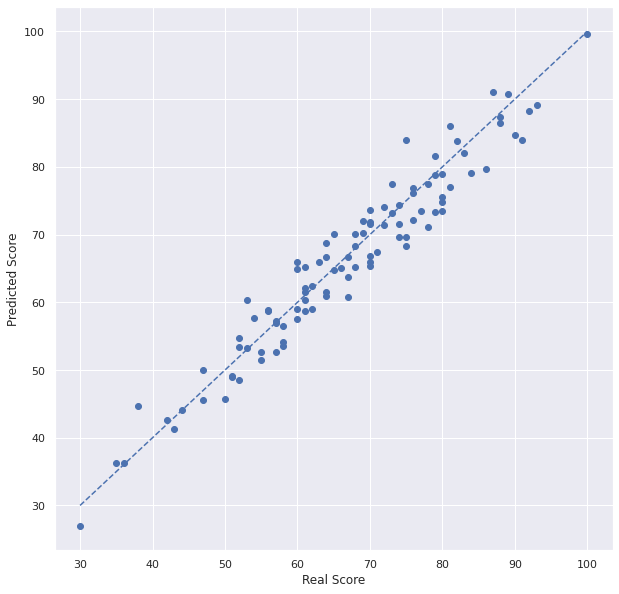

In [31]:
# Plotting the real values and predicted values

plt.figure(figsize=(10, 10))
plt.xlabel("Real Score")
plt.ylabel("Predicted Score")
plt.scatter(x=y_test, y=predict)
plt.plot([30, 100], [30, 100], linestyle="dashed")

plt.show()

The random forest model was shown to have a good performance to detect outliers and MAE of 2.8956. The difference between the real and the predicted value can be seen by the vertical distance from the point to the line.

### **SVM (Support Vector Machine)**

**Why choose SVM?**

* SVM increase dimensionality of the data, making possible a separation of the data based on the labels of each category
* It's robust against outliers
* Seems perfect for our dataset

**Preprocessing**

In [32]:
# Separating data of the predict target
x = df[["gender", "race/ethnicity", "parental level of education", "test preparation course", "lunch", "math score", "reading score"]]
y = df[["writing score"]]

# Loading LabelEncoder
label_x = LabelEncoder()

# Transforming the non numerical data into numerical data
x["gender"]                      = label_x.fit_transform(x["gender"])
x["race/ethnicity"]              = label_x.fit_transform(x["race/ethnicity"])
x["parental level of education"] = label_x.fit_transform(x["parental level of education"])
x["test preparation course"]     = label_x.fit_transform(x["test preparation course"])
x["lunch"]                       = label_x.fit_transform(x["lunch"])

# Loading StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Applying normalization to the data so that they will be on the same scale
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

# Separating training data of test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

**Model Creation**

In [33]:
# Training Support Vector Model
svm_regressor = SVR(kernel="linear", C=0.6)
svm_regressor.fit(x_train, y_train)

# Predicting values to the target
predict = svm_regressor.predict(x_test)

# Transforming back to the previous scale
predict_unscaled = scaler_y.inverse_transform(predict)
y_test_unscaled = scaler_y.inverse_transform(y_test)

# Checking the mean absolute error
mae = mean_absolute_error(y_test_unscaled, predict_unscaled)
mae

2.7249249980723995

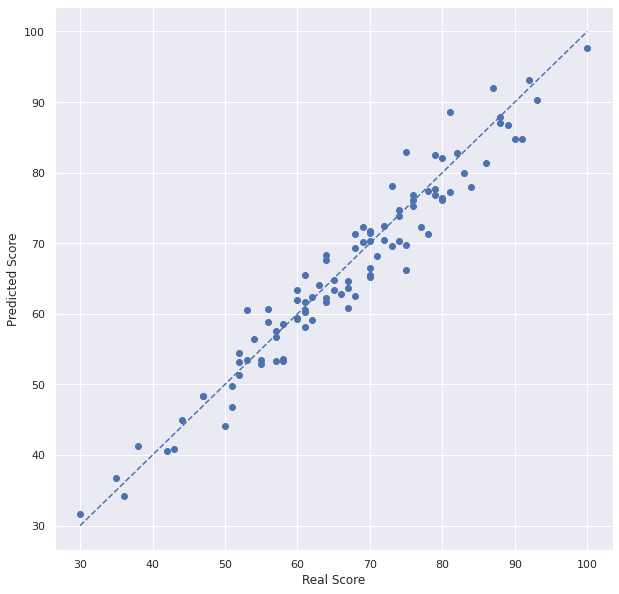

In [34]:
# Plotting the real values and predicted values

plt.figure(figsize=(10, 10))
plt.xlabel("Real Score")
plt.ylabel("Predicted Score")
plt.scatter(x=y_test_unscaled, y=predict_unscaled)
plt.plot([30, 100], [30, 100], linestyle="dashed")

plt.show()

Despite having a higher performance and being a robust model against outliers, it performed worse in trying to detect them when compared to the previous model